In [1]:
%load_ext autoreload

In [2]:
# !pip install wandb
# import wandb

%autoreload 2
from subgrid_parameterization.preprocess import SAM_helpers as sam
from subgrid_parameterization.preprocess.C14 import get_C14

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from sklearn.metrics import r2_score

In [3]:
path0 = '/glade/work/stepheba/les_and_clubb_benchmark_runs/stepheba_sam_runs/derecho/'

path = 'sam-bomex/'
file = 'BOMEX_64x64x75_100m_40m_1s'
# file = 'BOMEX_3d'

# path = 'sam-rf01/'
# file = 'DYCOMS_RF01_96x96x320'
# file = '*_3d'

# # RF01 won't work until stretched grid is implemented
# path = 'sam-rf02/'
# file = 'DYCOMS_RF02_128x128x96_dr_nosed'
# file = '*_3d'


In [4]:
ds=xr.open_dataset(path0+path+file+'.nc')

In [5]:
# nzm, nzt, ngrdcol, zm, zt, dzm, dzt, invrs_dzm, invrs_dzt
nzm, nzt, ngrdcol, zm, zt, dzm, dzt, invrs_dzm, invrs_dzt = sam.get_grid(ds)

In [6]:
C14=get_C14(ds)

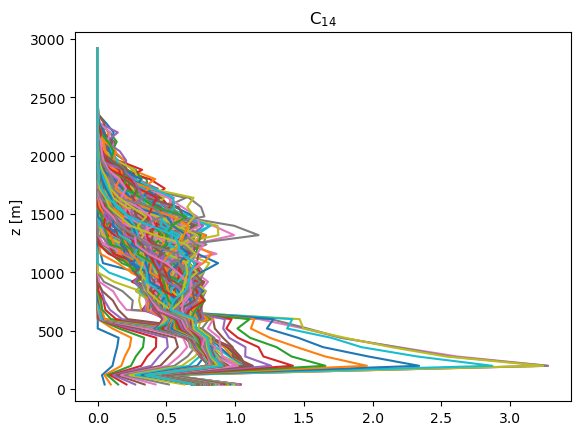

In [7]:
itime=range(ngrdcol)
kstart=0
kend= nzm #int(0.75*nzm)
plt.plot(C14[itime, kstart:kend].T,zt[itime, kstart:kend].T)#,label='C14')
plt.ylabel('z [m]')
plt.title(r'C$_{14}$');

In [8]:
U2DFSN = sam.stagger_var('U2DFSN',ds,zt)
V2DFSN = sam.stagger_var('V2DFSN',ds,zt)

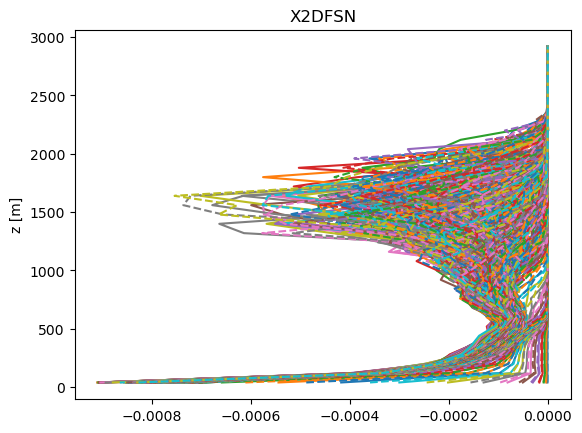

In [9]:
plt.plot(U2DFSN[itime, kstart:kend].T,zt[itime, kstart:kend].T,'-')#,label='U2DFSN')
plt.plot(V2DFSN[itime, kstart:kend].T,zt[itime, kstart:kend].T,'--')#label='V2DFSN')
plt.ylabel('z [m]')
plt.title('X2DFSN');

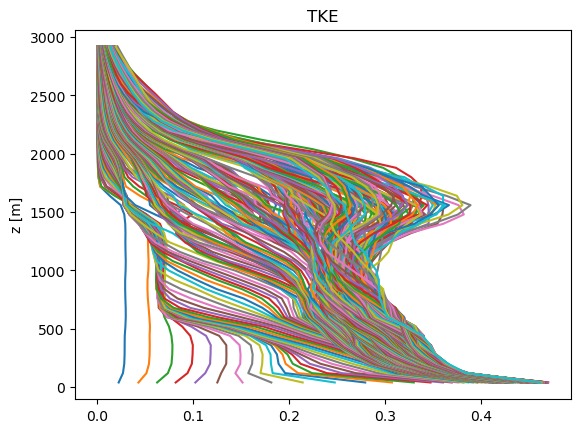

In [10]:
U2 = sam.stagger_var('U2',ds,zt)
V2 = sam.stagger_var('V2',ds,zt)
W2 = sam.stagger_var('W2',ds,zt)
e = 0.5*np.sqrt(U2 + V2 + W2)

plt.plot(e[itime, kstart:kend].T,zt[itime, kstart:kend].T,label='e')
plt.ylabel('z [m]')
plt.title('TKE');

In [11]:
np.sum(e<=0)

np.int64(0)

In [12]:
# np.mean(U2DFSN[U2DFSN>0])
# np.sum( UV2DFSN>0 )
# np.sum( V2DFSN>0 )
np.sum( (U2DFSN+V2DFSN)>0 )

np.int64(219)

In [13]:
np.sum( V2DFSN>0 )

np.int64(213)

In [14]:
# kend = np.argmin(np.abs(zt[itime]-2000))
# plt.hist(C14[:,kstart:kend].flatten(),bins = 100);

In [15]:
print(np.sum(C14<0))
np.sum(C14==0)

219


np.int64(3487)

In [16]:
C14_nonZero=C14[C14>0]

Text(0, 0.5, 'Count')

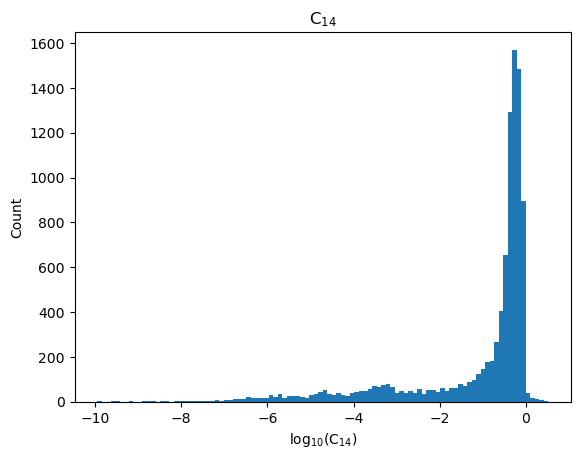

In [17]:
plt.hist(np.log10(C14_nonZero),bins = 100);
plt.title(r'C$_{14}$')
plt.xlabel(r'log$_{10}$(C$_{14}$)')
plt.ylabel('Count')

In [18]:
# np.mean(C14_nonZero)
np.mean(C14)

np.float64(0.2823675679720799)